Data Set used from: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data?select=Bengaluru_House_Data.csv

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
# reading csv file
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# size of the dataframe
df.shape

(13320, 9)

In [5]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
# Checking the unique area_type in our data set:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
# Here we're assuming that these variables are not required for price prediction.
# Hence, dropping some of the variables.
df1 = df.drop(['area_type','society','availability','balcony'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
# Shape of remaining dataFrame
df1.shape

(13320, 5)

In [9]:
# Lets check for the NULL values:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
# So for null values we can either drop the rows or impute. 

In [11]:
# Remove the NULL values
banglore_df = df1.dropna()
# Validate the final df
banglore_df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
banglore_df.shape

(13246, 5)

## Feature Engineering

###  Adding New feature: BHK derived from size column

In [13]:
# Now, first explore size column
banglore_df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
# lets extract only the number from this column & create separate column
banglore_df['BHK'] = banglore_df['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-14-df44f38a8ad4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banglore_df['BHK'] = banglore_df['size'].apply(lambda x: int(x.split(' ')[0]))


In [15]:
banglore_df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
# checking the unique values of BHK
banglore_df['BHK'].unique() 

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
banglore_df[banglore_df.BHK > 20]
# Probably outliers, will handle later

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


### Correcting total_sqft column values

In [18]:
# total_sqft field has records as range
banglore_df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
# function to check if there total_sqft contains range or other values.
def  is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
# this will return the True values.
banglore_df[banglore_df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [21]:
# but we need the False values.
banglore_df[~banglore_df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [22]:
# function to convert range values to average of the range
def convert_sqft_range_num(x):
    nums = x.split('-')
    if len(nums)==2:
        return np.mean([float(n) for n in nums])
    try:
        return float(x)
    except:
        return None

In [23]:
convert_sqft_range_num('1600sq')
# doesn't return anything

In [24]:
convert_sqft_range_num('1000-1200')

1100.0

In [25]:
# Now lest apply this function on the new copy of the banglore_df dataframe.
banglore_df1 = banglore_df.copy()

banglore_df1['total_sqft'] = banglore_df1['total_sqft'].apply(convert_sqft_range_num)
banglore_df1.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
# checking value at previous location
banglore_df1.iloc[[30]]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2475.0,4.0,186.0,4


In [27]:
# all the values are corrected
banglore_df1[~banglore_df1['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,BHK


### Adding price_per_sqft column:

In [28]:
# adding new column to the same dataFrame:
banglore_df1['price_per_sqft'] = banglore_df1['price']*100000/banglore_df1['total_sqft']
banglore_df1.head(2)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615


### Exploring location column:

In [29]:
# Since, in this dataframe we have one categorical variable (location). We can first check the number of unique location
# and then transform it based on number of properties in the location

In [30]:
# First remove extra spaces from location:
banglore_df1['location'] = banglore_df1['location'].apply(lambda x: x.strip())

In [31]:
# print unique counts
banglore_df1['location'].nunique()

1293

In [32]:
# checking count per location:
banglore_df1.location.value_counts() 

Whitefield                535
Sarjapur  Road            392
Electronic City           304
Kanakpura Road            266
Thanisandra               236
                         ... 
Byrasandra Extension        1
Banashankari 6th Stage      1
Hanumagiri                  1
Vasantapura main road       1
Jeevanhalli                 1
Name: location, Length: 1293, dtype: int64

In [33]:
# since there are lots of less properties, we can change the location to 'Other'
location_stats = banglore_df1['location'].value_counts()
location_stats

Whitefield                535
Sarjapur  Road            392
Electronic City           304
Kanakpura Road            266
Thanisandra               236
                         ... 
Byrasandra Extension        1
Banashankari 6th Stage      1
Hanumagiri                  1
Vasantapura main road       1
Jeevanhalli                 1
Name: location, Length: 1293, dtype: int64

In [34]:
#location where count is <= 10.

location_less_than_10 = location_stats[location_stats <= 10]
location_less_than_10

Sector 1 HSR Layout       10
1st Block Koramangala     10
Ganga Nagar               10
Dodsworth Layout          10
Dairy Circle              10
                          ..
Byrasandra Extension       1
Banashankari 6th Stage     1
Hanumagiri                 1
Vasantapura main road      1
Jeevanhalli                1
Name: location, Length: 1052, dtype: int64

### Dimensionality reduction

In [35]:
# Here we're going to update the location as 'Other', if the number of count is less than 10.
# this will help us in hot encoding, when we'll have fewer dummy columns.

banglore_df1['location'] = banglore_df1['location'].apply(lambda x: 'Other' if x in location_less_than_10 else x)
# checking the number of unique location:
banglore_df1.location.nunique()

242

In [36]:
banglore_df1.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Removing outliers using Business Logic 

In [37]:
# Baed on domain knowledge, we can set some rules or threshold. Which can help in removing outliers.
# Here, we're assuming that if total_sqft per room is less than 300, then it is outlier or an err record.

banglore_df1[ banglore_df1['total_sqft']/banglore_df1['BHK'] < 300]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [38]:
# Lets remove these values and store the rest of the records for further processing:
# or we could've just written greater than 300 area records only.
banglore_df2 = banglore_df1[~(banglore_df1['total_sqft']/banglore_df1['BHK'] < 300)]
banglore_df2.shape

(12502, 7)

### Outlier Removal using Standard Deviation and Mean

In [39]:
# Now lets look at the price_per_sqft column:
banglore_df2['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### There is a lot of variation among min & max value, we can remove outliers based on price per location.

In [40]:
#banglore_df2.groupby(by='location').agg({'price_per_sqft':[np.mean, np.std]})

def remove_outliers(df):
    # initialize the output datafram
    df_out = pd.DataFrame()
    
    for loc, groups in df.groupby('location'):
        mean_per_loc = np.mean(groups.price_per_sqft)
        std_per_loc  = np.std(groups.price_per_sqft)
        # only including the records which are within 1 standard deviation (per location)
        reduced_df =  groups[(groups.price_per_sqft > (mean_per_loc - std_per_loc)) & 
                             (groups.price_per_sqft <= (mean_per_loc + std_per_loc))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
        
    return df_out

In [41]:
# calling the new function:
banglore_df3 = remove_outliers(banglore_df2)
banglore_df3.shape

(10241, 7)

#### Lets check the prices for 2 BHK and 3 BHK houses

In [42]:
# Generinc function which take dataframe & location. And then prints scatter plot for prices between 2BHK & 3BHK homes
def plot_scatter_graph(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

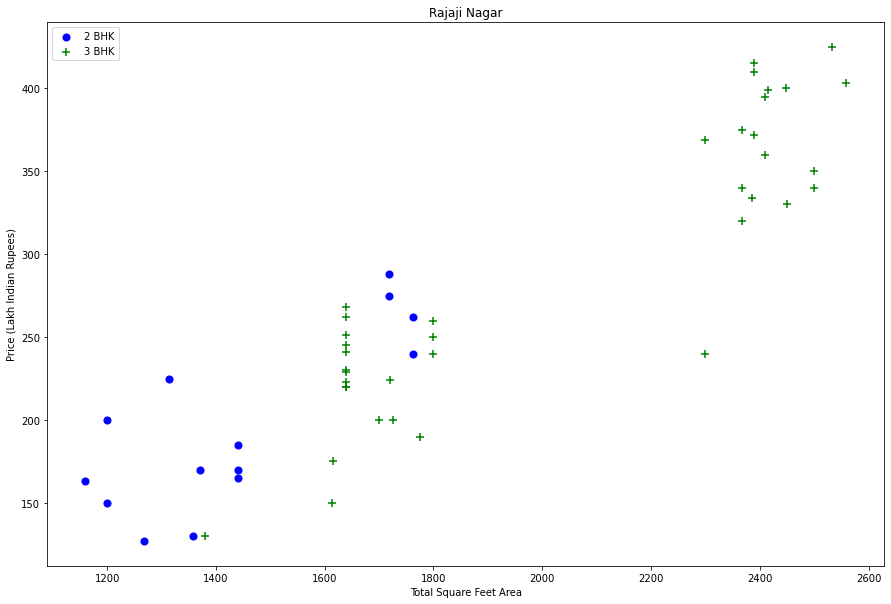

In [43]:
plot_scatter_graph(banglore_df3,'Rajaji Nagar')

##### Here for same location and same square feet area, prices for 2 bhk houses are greater than 3 bhk.

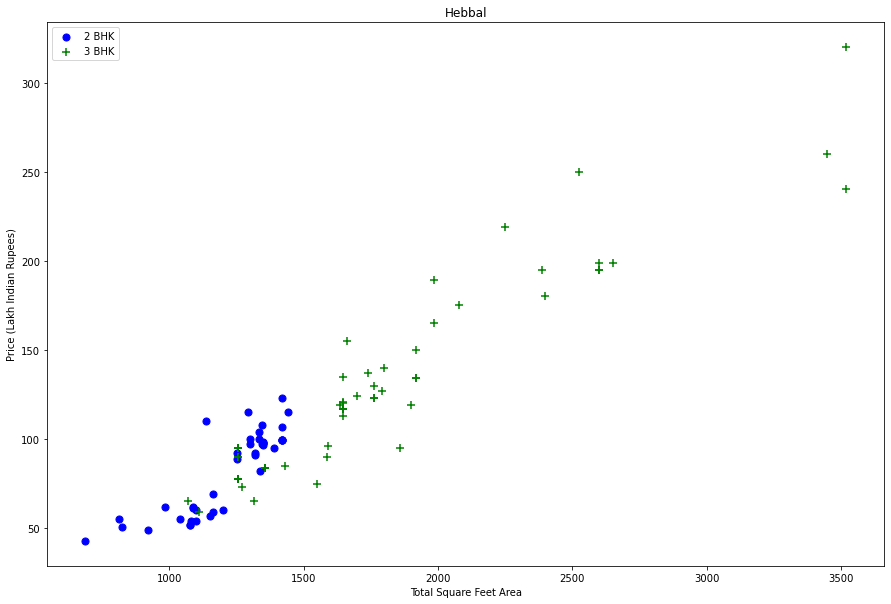

In [44]:
plot_scatter_graph(banglore_df3,'Hebbal')

We will remove properties where for same location price of 3 BHK apartment is less than 2 BHK apartment.For this I'll create dictionary for each BHK and then I'll compare the mean with previous BHK values.

{
    '1' : {
        'mean': 3500,
        'std: 1800,
        'count': 24
    },
    '2' : {
        'mean': 4100,
        'std: 2100,
        'count': 27
    },    
}

In [45]:
# function to detect & remove BHK outliers:

def remove_BHK_outliers(df):
    exclude_indices = np.array([])
    for loc, location_df in df.groupby('location'):
        bhk_statistics = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_statistics[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_statistics.get(bhk-1)
            if stats and stats['count']>5:
                # storing indices in numpy array
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices,axis='index')

In [46]:
banglore_df4 = remove_BHK_outliers(banglore_df3)
banglore_df4.shape

(7329, 7)

#### Plotting again for the same 2 previous locations:

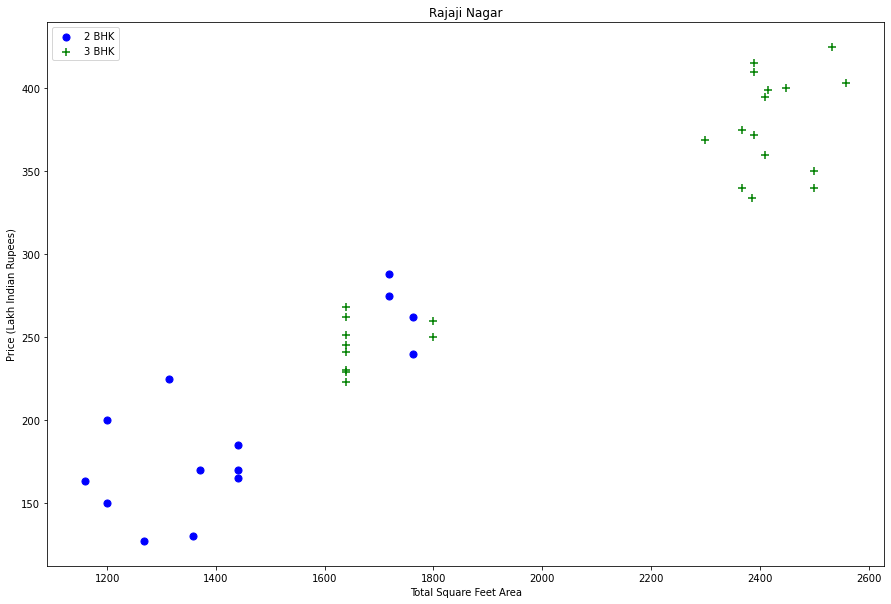

In [47]:
plot_scatter_graph(banglore_df4,'Rajaji Nagar')

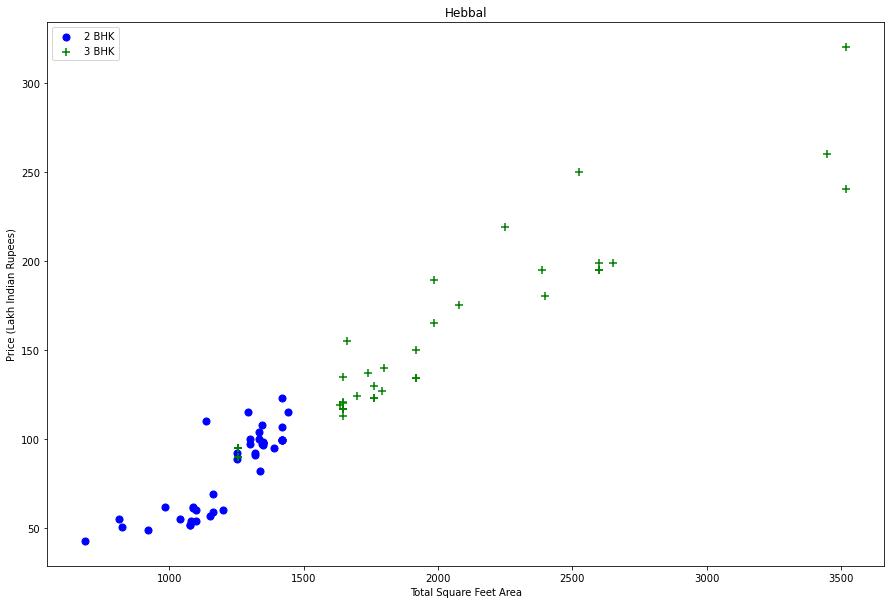

In [48]:
plot_scatter_graph(banglore_df4,'Hebbal')

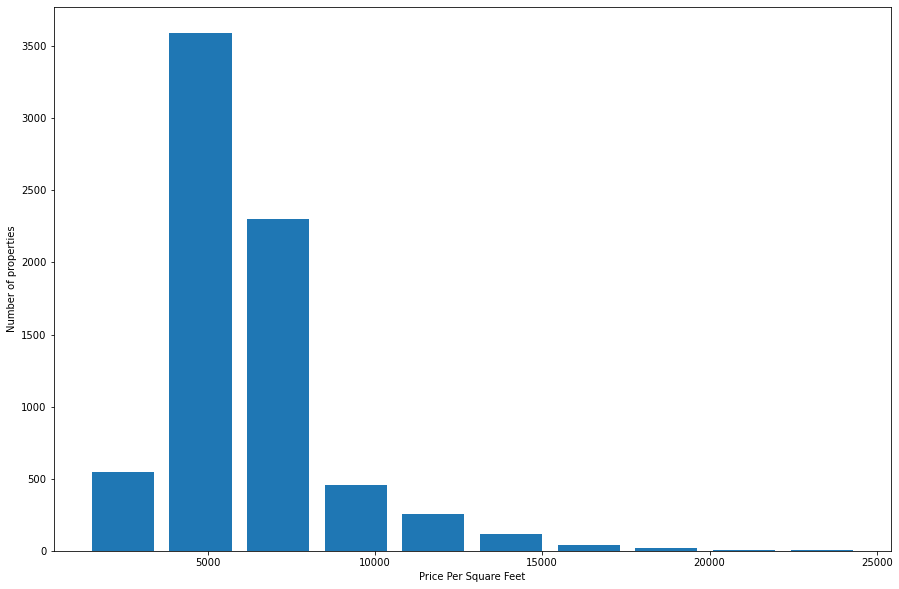

In [49]:
# Checking properties by plotting historgram of price_per_square_feet  

plt.hist(banglore_df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Number of properties")
plt.show()

#### Outliers for bathroom feature

In [50]:
# Find the unique bathroom values
banglore_df4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

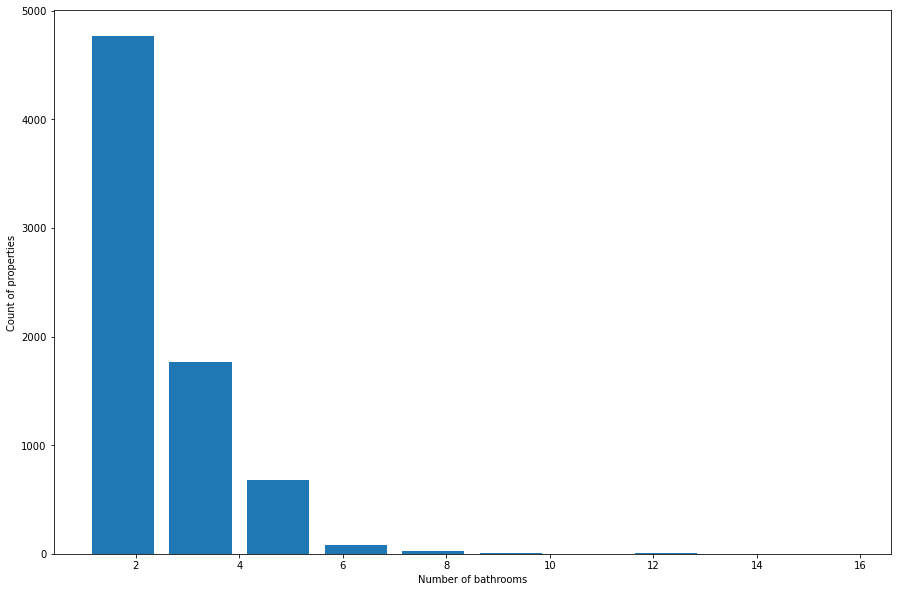

In [51]:
# bathrooms could be outliers, we'll have to consult business user to set the rules for finding outliers!
plt.hist(banglore_df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count of properties")
plt.show()

#### Business has suggested that its unusal to have properties where number of bathrooms > (Number of bedrooms) +2.


In [52]:
# Lets find such properties.
banglore_df4[banglore_df4.bath > banglore_df4.BHK +2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5850,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9012,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [53]:
#banglore_df4.shape

#### Business has again suggested to only keep the maximum limit of bathroom to be (total bedrooms +1 )

In [54]:
# Changing the selection criteria:
banglore_df5 = banglore_df4[banglore_df4.bath < banglore_df4.BHK +2]
banglore_df5.shape

(7251, 7)

In [55]:
banglore_df5.head(3)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333


#### Finally drop the columns which are not required for modeling

In [56]:
# dropping size & price_per_sqft columns:
df_final = banglore_df5.drop(['size','price_per_sqft'],axis='columns')

In [57]:
df_final.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [58]:
df_final.shape

(7251, 5)

### One hot encoding for Location

In [59]:
# use pands get_dummies method
# pd.get_dummies(df_final)

dummies = pd.get_dummies(df_final.location)
# It converts categorical values to 1 or 0.
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Now append this dummies dataframe with df_final:
df_final1 = pd.concat([df_final,dummies.drop('Other',axis='columns')],axis='columns') # dropping Other from dummies.
df_final1.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# We can drop location column as well, since it is already converted.
df_final1.drop('location',axis='columns',inplace=True)
# Dropping using inplace True

df_final1.shape

(7251, 245)

### Building Models

In [62]:
df_final1.head(3)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Lets break the data into X (Independent variables) & y (dependent variable)

X = df_final1.drop('price',axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X.shape

(7251, 244)

In [65]:
# and y can be assigned as:
y = df_final1['price']
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [66]:
y.shape

(7251,)

In [67]:
# Import linear regression models from sklearn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [68]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8691914452174444

### Using K Fold cross validation to measure accuracy of the model

In [69]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85430675, 0.84187647, 0.84728412, 0.85171729, 0.87168018])

#### we can see that even in 5 iterations we are getting score which is above 80% everytime. Now lets try some other model to find out which one fits best.

## Find best model using GridSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_gridSearchcv(X,y):
    algos = {
             'linear_regression' : {
             'model': LinearRegression(),
             'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_gridSearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.853373,{'normalize': True}
1,lasso,0.727661,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.731251,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


#### From above model comparison we can say that Linear Regression performs the best score. So, we'll use it for prediction

### Test the model :

In [71]:
# using it to access column location.
np.where(X.columns=='5th Block Hbr Layout')[0][0]

7

In [72]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [91]:
# Test1
predict_price('1st Phase JP Nagar',1000, 2,2)

82.81981031368403

In [94]:
# Test 2
predict_price('Indira Nagar',1000, 2, 2)

179.3706688280748

### Export the model to a pickle file

In [95]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

### Export location & column information in json file:


In [96]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))